In [1]:
from ctypes import sizeof
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

file = uproot.open("data/full_sim.root")

array_Tree = file["ana/single_neutron"]
array_Branches = array_Tree.arrays(library="np")
print(array_Branches['tdc'])

nCap_Tree = file["ana/NeutronCapture"]
nCap_Branches = nCap_Tree.arrays(library="np")
print(nCap_Branches)

[array([2681, 2682, 2683, 2685, 2686, 2687, 2687, 2688, 2689, 2690, 2691,
        2692, 2693, 2694, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2687,
        2688, 2689, 2690, 2691, 2692, 2693, 2694, 2750, 2751, 2719, 2720,
        2722, 2723, 2732, 2733, 2734, 2735, 2739, 2740, 2741, 2742, 2743,
        2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2718, 2719,
        2720, 2721, 2722, 2723, 2724, 2725, 2731, 2732, 2733, 2734, 2735,
        2736, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2746, 2747, 2748,
        2749, 2750, 2751, 2752, 2753, 2754, 2717, 2718, 2718, 2718, 2719,
        2719, 2719, 2721, 2721, 2721, 2721, 2723, 2723, 2724, 2724, 2725,
        2716, 2717, 2718, 2718, 2721, 2721, 2724, 2681, 2682, 2683, 2684,
        2685, 2686, 2687, 2689, 2690, 2691, 2692, 2693, 2682, 2683, 2684,
        2686, 2687, 2687, 2688, 2690, 2692, 2693, 2694, 2682, 2683, 2684,
        2685, 2688, 2689, 2691, 2692, 2731, 2732, 2733, 2734, 2735, 2736,
        2732, 2733, 2734, 2735, 2720, 

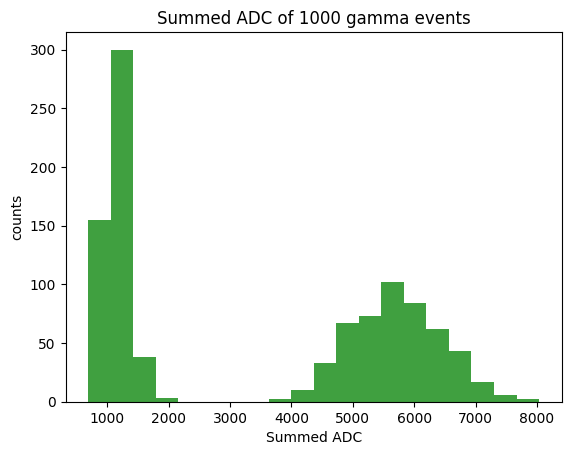

In [2]:
total_sum_adc = []
adc = array_Branches['adc']
for i in range(0, 997):
    adc_temp = np.array(adc[i])
    total_sum_adc.append(np.sum(adc_temp))
total_sum_adc = np.array(total_sum_adc)

# counts, edges = np.histogram(total_sum_adc, bins = 10)
# counts_err = counts**0.5
plt.hist(total_sum_adc, 20, facecolor='g', alpha=0.75)
plt.xlabel('Summed ADC')
plt.ylabel('counts')
plt.title('Summed ADC of 1000 gamma events')
plt.show()

In [6]:
gamma_energies_real = [] #energies of the gammas produced in geant
gamma_number_real = [] #number of gammas produced in each event
# gamma_xMomen_real = []
# gamma_yMomen_real = []
# gamma_zMomen_real = []
with open('data/gamma_pointCloud_input_10000_0.dat') as f:
    num_gammas = -1
    gamma_e_temp = []
    # gamma_Px_temp = []
    # gamma_Py_temp = []
    # gamma_Pz_temp = []
    for line in f:
        data = line.split()
        data = np.array([eval(i) for i in data])
        if data.size == 2:
            num_gammas = data[1]
            gamma_number_real.append(data[1])
        if data.size != 2:
            gamma_e_temp.append(data[9])
            # gamma_Px_temp.append(data[6]/data[9])
            # gamma_Py_temp.append(data[7]/data[9])
            # gamma_Pz_temp.append(data[8]/data[9])
            num_gammas -= 1
        if num_gammas == 0:
            gamma_energies_real.append(gamma_e_temp[:])
            # gamma_xMomen_real.append(gamma_Px_temp[:])
            # gamma_yMomen_real.append(gamma_Py_temp[:])
            # gamma_zMomen_real.append(gamma_Pz_temp[:])
            gamma_e_temp.clear()
            # gamma_Px_temp.clear()
            # gamma_Py_temp.clear()
            # gamma_Pz_temp.clear()
gamma_energies_real = np.round(gamma_energies_real, 6)
unique_labels = np.unique(gamma_energies_real)
print(unique_labels)
labels = []
for gamma in gamma_energies_real:
    for ii, label in enumerate(unique_labels):
        if gamma == label:
            labels.append(ii)
labels = np.array(labels)
pos = []
tdc = np.concatenate(array_Branches['tdc'])
adc = np.concatenate(array_Branches['adc'])
channel = np.concatenate(array_Branches['channel'])


tdc_mean = np.mean(tdc)
tdc_std = np.std(tdc)
adc_mean = np.mean(adc)
adc_std = np.std(adc)
channel_mean = np.mean(channel)
channel_std = np.std(channel)

for ii in range(len(array_Branches['tdc'])):
    temp_pos = []
    for jj in range(len(array_Branches['tdc'][ii])):
        temp_pos.append([
            (array_Branches['tdc'][ii][jj] - tdc_mean)/tdc_std,
            (array_Branches['channel'][ii][jj] - channel_mean)/channel_std,
            (array_Branches['adc'][ii][jj] - adc_mean)/adc_std
        ])
    pos.append(np.array(temp_pos))
print(pos[0])

np.savez(
    "data/gamma_pointcloud.npz",
    pos=np.array(pos),
    energies=np.array(gamma_energies_real[:5000]),
    labels=np.array(labels[:5000])
)



[0.001187 0.004745]
[[-0.2529884  -0.74756475 -0.28865957]
 [-0.24998389 -0.74756475 -0.23423176]
 [-0.24697938 -0.74756475 -0.23423176]
 ...
 [-0.03365929  0.82428416  1.18089132]
 [-0.04567733  0.82568136 -0.39751519]
 [-0.04267282  0.82568136 -0.28865957]]


/tmp/ipykernel_64107/865253381.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos=np.array(pos),


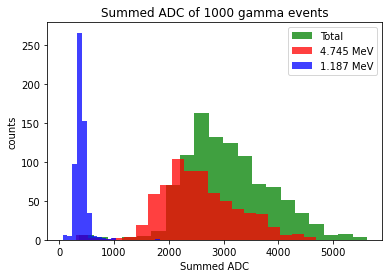

In [4]:
# sim_e = np.array(sim_flat)
real_e = np.array(real_flat)
sum_adc = np.array(adc_flat)
gamma_1 = (np.round(real_e, 3) == 4.745)
gamma_2 = (np.round(real_e, 3) == 1.187)
sum_adc_gamma_1 = sum_adc[gamma_1]
sum_adc_gamma_2 = sum_adc[gamma_2]

plt.hist(total_sum_adc, 20, facecolor='g', alpha=0.75)
plt.hist(sum_adc_gamma_1, 20, facecolor='r', alpha=0.75)
plt.hist(sum_adc_gamma_2, 20, facecolor='b', alpha=0.75)
plt.xlabel('Summed ADC')
plt.ylabel('counts')
plt.legend(["Total", "4.745 MeV", "1.187 MeV"])
plt.title('Summed ADC of 1000 gamma events')
plt.savefig('gamma_test_plots/sumADCofGammas.jpeg', format='jpeg', dpi=300)
plt.show()

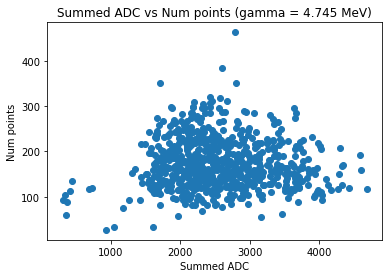

In [8]:
real_e = np.array(real_flat)
n_pts = np.array(num_pts_flat)
sum_adc = np.array(adc_flat)

gamma_1 = (np.round(real_e, 3) == 4.745)
sum_adc_gamma_1 = sum_adc[gamma_1]
n_pts_gamma_1 = n_pts[gamma_1]

plt.scatter(sum_adc_gamma_1, n_pts_gamma_1)
plt.xlabel("Summed ADC")
plt.ylabel("Num points")
plt.title("Summed ADC vs Num points (gamma = 4.745 MeV)")
# plt.xlim([0,7])
# plt.ylim([0,7])
plt.savefig('gamma_test_plots/sumADCvNumPts4MeV.jpeg', format='jpeg', dpi=300)
plt.show()

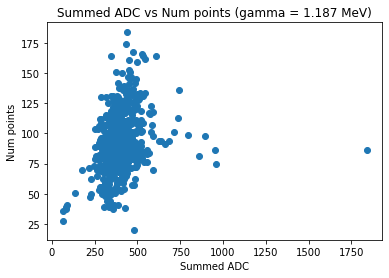

In [9]:
gamma_2 = (np.round(real_e, 3) == 1.187)
sum_adc_gamma_2 = sum_adc[gamma_2]
n_pts_gamma_2 = n_pts[gamma_2]

plt.scatter(sum_adc_gamma_2, n_pts_gamma_2)
plt.xlabel("Summed ADC")
plt.ylabel("Num points")
plt.title("Summed ADC vs Num points (gamma = 1.187 MeV)")
# plt.xlim([0,7])
# plt.ylim([0,7])
plt.savefig('gamma_test_plots/sumADCvNumPts1MeV.jpeg', format='jpeg', dpi=300)
plt.show()